### Contents

1. Imports
2. Hour of day histogram
3. Distribution of orders by loyalty
4. Are expenditures different depending on time of day?
5. Age vs. Number of Dependents
6. Age and Income

### Imports

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Import data
path = r'C:\Users\rhtho\Documents\CareerFoundry\Data Immersion\Achievement 4\04-2023 Instacart Basket Analysis'
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged_4.9_1.pkl'))

### Hour of day histogram

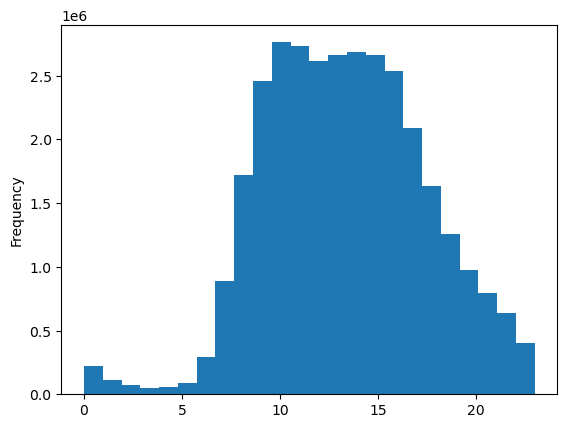

In [5]:
# Create histogram about sales
hist = df['order_hour_of_day'].plot.hist(bins = 24)

The histogram above demonstrates that most orders occur in the middle of the day.  The most orders come in at 10 and 11am, presumably to be ready for lunch.  The second highest group is mid-afternoon, presumably so that the orders are delivered by the time people get done with work around 5pm.  Not many orders come in between midnight and 6am because people aren't usually awake yet.

In [16]:
# Save figure as png
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day.png'))

In [4]:
# Value counts
df['order_hour_of_day'].value_counts(dropna=False)

10    2761760
11    2736140
14    2689136
15    2662144
13    2660954
12    2618532
16    2535202
9     2454203
17    2087654
8     1718118
18    1636502
19    1258305
20     976156
7      891054
21     795637
22     634225
23     402316
6      290493
0      218769
1      115700
5       87961
2       69375
4       53242
3       51281
Name: order_hour_of_day, dtype: int64

### Distribution of orders by loyalty

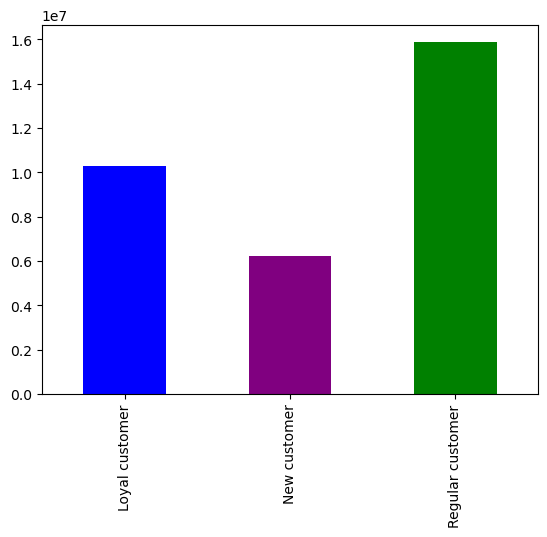

In [17]:
bar = df['loyalty_flag'].value_counts().sort_index().plot.bar(color =['blue','purple','green'])

In [18]:
# Save figure as png
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

### Are expenditures different depending on time of day?

In [10]:
# Create random subsets
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7
big = df[dev]
small = df[~dev]

In [11]:
df_2 = small[['order_hour_of_day','prices']]

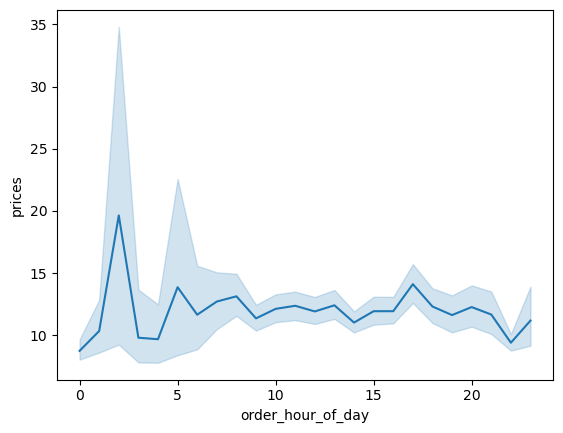

In [12]:
line = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')

The price peak at 2am doesn't seem to make sense because very few orders come in at that time.  One possible explanation is that people are buying expensive items when they're tired and making bad decisions late at night.  The second-highest peak is at 5pm when most people get done with work and they're probably hungry, tired, and thinking of having an expensive meal.

In [19]:
# Save figure as png
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_expenditures.png'))

### Age vs. Number of Dependents

In [15]:
# Create subset
df_3 = small[['Age','dependents']]

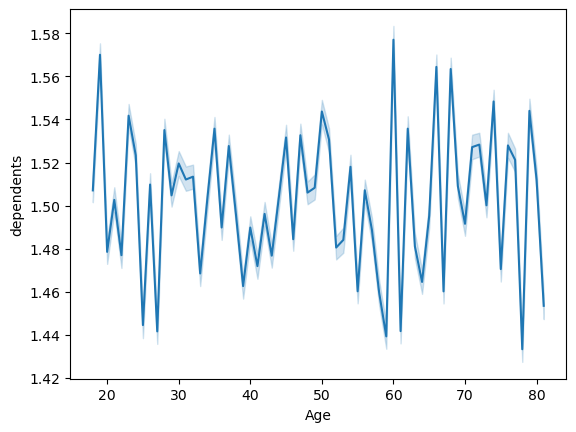

In [20]:
line2 = sns.lineplot(data = df_3, x = 'Age',y = 'dependents')

It's difficult to discern useful information from this chart.  The main takeaways are that only people between ages 20 and 80 have dependents.  The average number of dependents seems to be about 1.5 regardless of age group.

In [21]:
# Save figure as png
line2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dependents.png'))

### Age and Income

In [23]:
# Create subset
df_4 = small[['Age','income']]

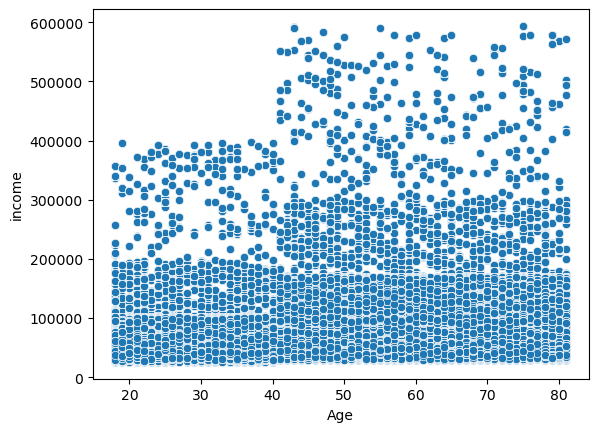

In [24]:
# Save figure as png
scatter = sns.scatterplot(x = 'Age', y = 'income',data = df_4)

The scatterplot shows a clear difference between customers younger than 40 and older than 40.  Most customers under age 40 have an income less than 200,000 with some outliers making 200,000 - 400,000 and nobody earning more than 400,000.  Many customers over the age of 40 make less than 200,000 but a lot of customers also make between 200,000 and 400,000.  Additionally, some people over the age of 40 make up to 600,000.

In [25]:
# Save figure as png
scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_income.png'))